### Configurações

In [1]:
%pip install pandas
%pip install numpy
%pip install html5lib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [16]:
%pip install pandas
%pip install requests  # Corrigido para 'requests'
%pip install lxml
%pip install numpy

import numpy as np
import pandas as pd
import requests

# URL da página com as tabelas
url = 'https://pt.wikipedia.org/wiki/Lista_dos_distritos_de_S%C3%A3o_Paulo_por_popula%C3%A7%C3%A3o'

# Baixar o conteúdo da página
response = requests.get(url)

# Verificar se a requisição foi bem-sucedida
if response.status_code == 200:
    tabelas = pd.read_html(response.text
                        #    , header=1
                           )  # Define a segunda linha como cabeçalho

    # Dicionário para armazenar os DataFrames
    dfs = {}

    # Criar um DataFrame para cada tabela e armazenar no dicionário
    for i, tabela in enumerate(tabelas):
        nome_df = f'df{i+1}'
        dfs[nome_df] = tabela
else:
    print(f"Erro ao acessar a página: {response.status_code}")

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


ERROR: Invalid requirement: '#'

[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip
C:\Users\joth1\AppData\Local\Temp\ipykernel_22532\3751246778.py:18: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tabelas = pd.read_html(response.text


In [17]:
# display(dfs['df2'])
df = dfs['df2'].copy()
df['Cidade'] = 'São Paulo'
df

,Unnamed: 0,Distrito,Pop. Total 2022,Pop. Urb. 2022,Cidade
0,1º,Grajaú,384873,382897,São Paulo
1,2º,Jardim Ângela,311432,311329,São Paulo
2,3º,Capão Redondo,270767,270767,São Paulo
3,4º,Sapopemba,266715,266715,São Paulo
4,5º,Sacomã,261436,261436,São Paulo
...,...,...,...,...,...
91,92º,Barra Funda,33436,33436,São Paulo
92,93º,Jaguara,24730,24730,São Paulo
93,94º,Sé,23832,23832,São Paulo
94,95º,Pari,17359,17359,São Paulo


In [18]:
# FONTE: https://www.imoveispro.com.br/blog/zonas-de-sp/

zona_central= [
    "Barra Funda", "Bela Vista", "Bom Retiro", "Brás", "Consolação", "Bras", "Liberdade", "Pari", "República", "Santa Cecília", "Sé"
]

zona_norte= [
        "Casa Verde", "Jaçanã", "Mandaqui", "Santana", "Tremembé", "Tucuruvi", "Vila Guilherme", "Vila Maria", "Vila Medeiros"
]

zona_leste = [
    "Água Rasa", "Aricanduva", "Artur Alvim", "Belém", "Cangaíba", "Carrão", "Cidade Líder", "Cidade Tiradentes", "Ermelino Matarazzo", 
    "Guaianases", "Iguatemi", "Itaim Paulista", "Itaquera", "Jardim Helena", "José Bonifácio", "Lajeado","Mooca", "Parque do Carmo", "Penha", 
    "Ponte Rasa", "São Lucas", "São Mateus", "São Miguel", "Sapopemba", "São Rafael", "Vila Matilde", "Vila Formosa", "Vila Prudente", "Tatuapé", "Vila Curuçá", "Vila Jacuí", "Itaim Bibi"
]

zona_sul=[
    "Cambuci", "Campo Belo", "Campo Grande", "Campo Limpo", "Capão Redondo", "Cidade Ademar", "Cidade Dutra", "Cursino", 
    "Grajaú", "Ipiranga", "Jabaquara", "Jardim Ângela", "Jardim Paulista", "Jardim São Luís", "Marsilac", "Moema", "Morumbi", 
    "Pedreira", "Parelheiros", "Sacomã", "Santo Amaro",
    "Saúde", "Socorro", "Vila Andrade", "Vila Mariana", "Vila Sônia"
]

zona_oeste=[
    "Alto de Pinheiros", "Anhanguera", "Brasilândia", "Butantã", "Cachoeirinha", "Freguesia do Ó", "Jaguaré", "Jaraguá", 'Jaguara',
    "Lapa", "Limão", "Perdizes", "Pinheiros", "Pirituba", "Raposo Tavares", "Rio Pequeno", "São Domingos", "Vila Leopoldina", "Perus"
]

# Validação para garantir que há 96 distritos no total
total_distritos = (
    len(zona_central) + len(zona_norte) + len(zona_leste) + len(zona_sul) + len(zona_oeste)
)
total_distritos


97

In [19]:
df['ds_zona_sp'] = np.where(
        df['Distrito'].isin(zona_leste), 'Zona Leste'
        ,np.where(
            df['Distrito'].isin(zona_oeste), 'Zona Oeste'
            ,np.where(
            df['Distrito'].isin(zona_norte), 'Zona Norte'
            , np.where(
                df['Distrito'].isin(zona_sul), 'Zona Sul'
                ,np.where(df['Distrito'].isin(zona_central), 'Zona Central', 'Outros')
            )
            )
    )
)

In [22]:
soma = df['Pop. Total 2022'].sum()
soma

11451999

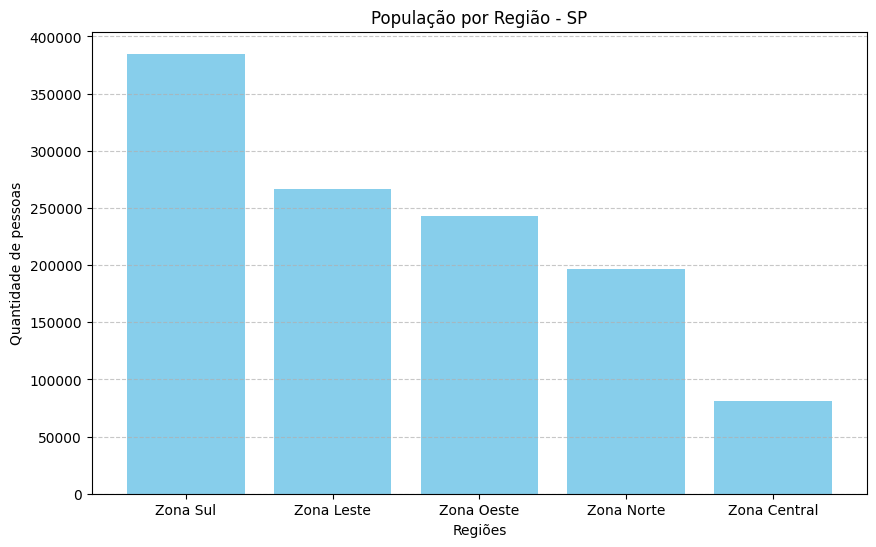

In [21]:
import matplotlib.pyplot as plt 

plt.figure(figsize=(10, 6))
plt.bar(df['ds_zona_sp'], df['Pop. Total 2022'], color='skyblue')

# Adicionando título e rótulos
plt.title('População por Região - SP')
plt.xlabel('Regiões')
plt.ylabel('Quantidade de pessoas')
plt.grid(axis='y', linestyle='--', alpha=0.7)


In [6]:
df_zona_leste = df.loc[df['ds_zona_sp'] == 'Zona Leste']
df_zona_leste

,Unnamed: 0,Distrito,Pop. Total 2022,Pop. Urb. 2022,Cidade,ds_zona_sp
3,4º,Sapopemba,266715,266715,São Paulo,Zona Leste
11,12º,Itaquera,210960,210960,São Paulo,Zona Leste
12,13º,Itaim Paulista,205295,205295,São Paulo,Zona Leste
14,15º,Cidade Tiradentes,194177,194160,São Paulo,Zona Leste
18,19º,Lajeado,164391,164391,São Paulo,Zona Leste
20,21º,São Mateus,155682,155682,São Paulo,Zona Leste
22,23º,Iguatemi,149700,149376,São Paulo,Zona Leste
23,24º,São Rafael,148145,148028,São Paulo,Zona Leste
25,26º,Cangaíba,141172,141172,São Paulo,Zona Leste
26,27º,Vila Curuçá,140673,140673,São Paulo,Zona Leste


In [7]:
# # fonte dos bairros que possuem terminal de onibus: https://www.sptrans.com.br/terminais

# distritos_metro = ['Itaquera', 'Tatuapé', 'Mooca', 'Vila Prudente', 'Penha', 'Brás', 'Liberdade']
# distritos_terminal_onibus = ['Itaquera', 'Tatuapé', 'São Rafael', 'Vila Prudente', 'Parque do Carmo', 'Carrão', 'Belém', 'Cidade Tiradentes', 'Penha']

# # Adicionando as colunas
# df_zona_leste['Possui Estação de Metrô'] = np.where(df_zona_leste['Distrito'].isin(distritos_metro), 'Sim', 'Não')
# df_zona_leste['Possui Terminal de Ônibus'] = np.where(df_zona_leste['Distrito'].isin(distritos_terminal_onibus), 'Sim', 'Não')

# display(df_zona_leste)

C:\Users\joth1\AppData\Local\Temp\ipykernel_22532\1939441723.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_zona_leste["populacao_em_k"] = df_zona_leste["Pop. Total 2022"] / 1000


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Sapopemba'),
  Text(1, 0, 'Itaquera'),
  Text(2, 0, 'Itaim Paulista'),
  Text(3, 0, 'Cidade Tiradentes'),
  Text(4, 0, 'Lajeado'),
  Text(5, 0, 'São Mateus'),
  Text(6, 0, 'Iguatemi'),
  Text(7, 0, 'São Rafael'),
  Text(8, 0, 'Cangaíba'),
  Text(9, 0, 'Vila Curuçá')])

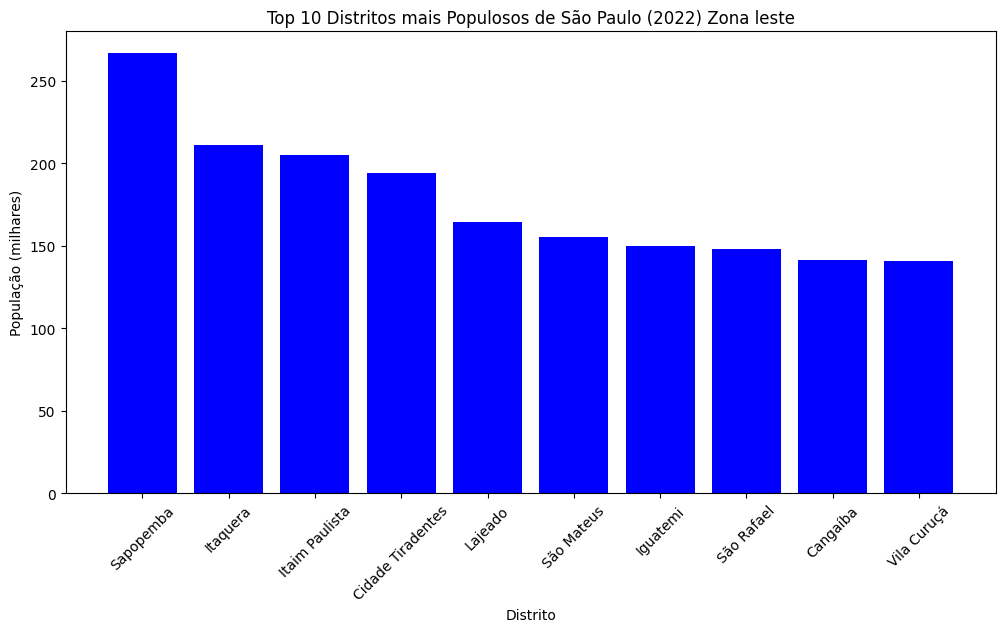

In [8]:
import matplotlib.pyplot as plt
df_zona_leste["populacao_em_k"] = df_zona_leste["Pop. Total 2022"] / 1000

# Selecionar os 10 bairros mais populosos
top_distritos = df_zona_leste.head(10)

# Criar o gráfico de barras
plt.figure(figsize=(12, 6))
plt.bar(top_distritos["Distrito"], top_distritos["populacao_em_k"], color="blue")

# Adicionar rótulos e título
plt.xlabel("Distrito")
plt.ylabel("População (milhares)")
plt.title("Top 10 Distritos mais Populosos de São Paulo (2022) Zona leste")
plt.xticks(rotation=45)

### Inferência de Sexo e Idade

In [9]:
# fonte: https://censo2010.ibge.gov.br/sinopse/webservice/frm_piramide.php?codigo=35&corhomem=3d4590&cormulher=9cdbfc


### Unidades de Saude

In [10]:
df_estabelecimentos = pd.read_csv(r"C:\Users\joth1\Downloads\dados_estabelecimento_saude.csv", delimiter=";")
df_estabelecimentos = df_estabelecimentos.loc[df_estabelecimentos['REGIAO5']=='Leste']
df_estabelecimentos = df_estabelecimentos[['SUBPREF', 'TIPO', 'BAIRRO', 'ENDERECO', 'DISTRITO', 'LONG', 'LAT', 'SUBPREF']]


df_estabelecimentos.columns = df_estabelecimentos.columns.str.upper()  # Aplica em df_estabelecimentos
df_zona_leste.columns = df_zona_leste.columns.str.upper()  # Aplica em df (se necessário)

df_estabelecimentos.columns = df_estabelecimentos.columns.str.strip()  # Aplica em df_estabelecimentos
df_zona_leste.columns = df_zona_leste.columns.str.strip()  # Aplica em df (se necessário)

df_zona_leste['DISTRITO'] = df_zona_leste['DISTRITO'].str.upper()

# Cruzo base de população com ubs
df_final = pd.merge(df_zona_leste, df_estabelecimentos, left_on='DISTRITO', right_on='DISTRITO', how='left')
# display(df_final)

import json
df_zona_leste = df_final.groupby(['DISTRITO'], as_index=False).agg({
    'POP. TOTAL 2022': 'first',  # Mantém a população do distrito
    'POP. URB. 2022': 'first',  # Mantém a população urbana do distrito
    'CIDADE': 'first',  # Mantém a cidade do distrito
    'DS_ZONA_SP': 'first',  # Mantém a zona
    'ENDERECO': lambda x: json.dumps(list(x.unique()))  # Cria um JSON com endereços únicos
})
df_zona_leste

C:\Users\joth1\AppData\Local\Temp\ipykernel_22532\4064606608.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_zona_leste['DISTRITO'] = df_zona_leste['DISTRITO'].str.upper()


,DISTRITO,POP. TOTAL 2022,POP. URB. 2022,CIDADE,DS_ZONA_SP,ENDERECO
0,ARICANDUVA,89574,89574,São Paulo,Zona Leste,"[""JOAO DE OLIVEIRA MELLO,CEL,R,440"", ""MIGUEL B..."
1,ARTUR ALVIM,95575,95575,São Paulo,Zona Leste,"[""NICOLO TARTAGLIA,R,45"", ""FRANCISCO DE TOLEDO..."
2,BELÉM,55785,55785,São Paulo,Zona Leste,[NaN]
3,CANGAÍBA,141172,141172,São Paulo,Zona Leste,[NaN]
4,CARRÃO,84397,84397,São Paulo,Zona Leste,[NaN]
5,CIDADE LÍDER,136660,136660,São Paulo,Zona Leste,[NaN]
6,CIDADE TIRADENTES,194177,194160,São Paulo,Zona Leste,"[""CADERNO DE VIAGEM,R,55"", ""FRANCISCO CARDOSO ..."
7,ERMELINO MATARAZZO,112333,112333,São Paulo,Zona Leste,"[""JOSE GOES NOGUEIRA,R,70"", ""RODRIGO DE BRUM,A..."
8,GUAIANASES,109316,109264,São Paulo,Zona Leste,"[""MACABU,R,35"", ""UTARO KANAI,R,286"", ""EVALDO C..."
9,IGUATEMI,149700,149376,São Paulo,Zona Leste,"[""SOMOS TODOS IGUAIS,R, 330"", ""BENTO GUELFI, A..."


### Inferencia ambulancias

In [11]:
# Dados retirados do site Gov: https://censo2010.ibge.gov.br/sinopse/webservice/frm_piramide.php?codigo=35&corhomem=3d4590&cormulher=9cdbfc

import pandas as pd

# Criando o DataFrame com base nos dados da imagem
dados = {
    "Faixa Etária": [
        "Mais de 100 anos", "95 a 99 anos", "90 a 94 anos", "85 a 89 anos", "80 a 84 anos",
        "75 a 79 anos", "70 a 74 anos", "65 a 69 anos", "60 a 64 anos", "55 a 59 anos",
        "50 a 54 anos", "45 a 49 anos", "40 a 44 anos", "35 a 39 anos", "30 a 34 anos",
        "25 a 29 anos", "20 a 24 anos", "15 a 19 anos", "10 a 14 anos", "5 a 9 anos", "0 a 4 anos"
    ],
    "Homens": [
        917, 4_534, 20_758, 63_558, 150_452,
        246_532, 371_655, 499_180, 705_940, 930_303,
        1_149_501, 1_308_852, 1_444_231, 1_549_270, 1_741_346,
        1_881_495, 1_835_222, 1_667_482, 1_687_826, 1_457_203, 1_361_616
    ],
    "Mulheres": [
        2_317, 12_323, 45_806, 121_030, 246_113,
        354_796, 484_550, 609_906, 831_069, 1_057_688,
        1_286_603, 1_444_270, 1_536_444, 1_634_852, 1_815_101,
        1_908_293, 1_802_466, 1_636_426, 1_637_087, 1_403_430, 1_313_756
    ]
}

df = pd.DataFrame(dados)

# Exibindo o DataFrame
print(df)

# Salvando como CSV
csv_filename = "distribuicao_populacao_sp.csv"
df.to_csv(csv_filename, index=False, encoding="utf-8-sig")


#  Extraio a base de dados
url = r'C:\Users\joth1\Desktop\DataScience\DataScience-Resources\Project\distribuicao_populacao_sp.csv'
df_pop_dados = pd.read_csv(url, encoding='utf-8')

df_pop_dados['TOTAL'] = df_pop_dados['Homens'] + df_pop_dados['Mulheres']
print(df_pop_dados.dtypes)


df_pop_dados['Mulheres'] = df_pop_dados['Mulheres'].astype(int)
df_pop_dados['TOTAL'] = df_pop_dados['TOTAL'].astype(int)

total_mulheres = df_pop_dados['Mulheres'].sum()
total_homens = df_pop_dados['Homens'].sum()

df_pop_dados['PERCENT_HOMENS'] = (df_pop_dados['Homens']/ (total_mulheres + total_homens)    ) * 100
df_pop_dados['PERCENT_MULHERES'] = (df_pop_dados['Mulheres']/ (total_mulheres + total_homens)     ) * 100
display(df_pop_dados)

        Faixa Etária   Homens  Mulheres
0   Mais de 100 anos      917      2317
1       95 a 99 anos     4534     12323
2       90 a 94 anos    20758     45806
3       85 a 89 anos    63558    121030
4       80 a 84 anos   150452    246113
5       75 a 79 anos   246532    354796
6       70 a 74 anos   371655    484550
7       65 a 69 anos   499180    609906
8       60 a 64 anos   705940    831069
9       55 a 59 anos   930303   1057688
10      50 a 54 anos  1149501   1286603
11      45 a 49 anos  1308852   1444270
12      40 a 44 anos  1444231   1536444
13      35 a 39 anos  1549270   1634852
14      30 a 34 anos  1741346   1815101
15      25 a 29 anos  1881495   1908293
16      20 a 24 anos  1835222   1802466
17      15 a 19 anos  1667482   1636426
18      10 a 14 anos  1687826   1637087
19        5 a 9 anos  1457203   1403430
20        0 a 4 anos  1361616   1313756
Faixa Etária    object
Homens           int64
Mulheres         int64
TOTAL            int64
dtype: object


,Faixa Etária,Homens,Mulheres,TOTAL,PERCENT_HOMENS,PERCENT_MULHERES
0,Mais de 100 anos,917,2317,3234,0.002222,0.005615
1,95 a 99 anos,4534,12323,16857,0.010988,0.029865
2,90 a 94 anos,20758,45806,66564,0.050308,0.111012
3,85 a 89 anos,63558,121030,184588,0.154034,0.293319
4,80 a 84 anos,150452,246113,396565,0.364624,0.596461
5,75 a 79 anos,246532,354796,601328,0.597477,0.859857
6,70 a 74 anos,371655,484550,856205,0.900715,1.174319
7,65 a 69 anos,499180,609906,1109086,1.209776,1.478123
8,60 a 64 anos,705940,831069,1537009,1.710864,2.014117
9,55 a 59 anos,930303,1057688,1987991,2.254613,2.563334


In [12]:
percent_homens_novo = df_pop_dados['PERCENT_HOMENS'].to_list()



percent_mulheres_novo = df_pop_dados['PERCENT_MULHERES'].to_list()
percent_homens_novo

[0.0022223730732334455,
 0.010988265555114986,
 0.05030754662396932,
 0.15403444687957615,
 0.3646242896555271,
 0.597476639575123,
 0.9007154466004101,
 1.2097755623736872,
 1.710863737533717,
 2.2546132357124256,
 2.7858452236149605,
 3.1720364685362505,
 3.500130955211573,
 3.7546956719393463,
 4.220196795619158,
 4.559851499916425,
 4.447707694880731,
 4.041185492804201,
 4.090489699785511,
 3.5315689306815665,
 3.2999113789354757]

### Inferencia da quantidade de homens que possuem na populaçõ da regiao

In [13]:
# Agora, vamos atualizar as faixas etárias com os percentuais fornecidos.88
tt = percent_homens_novo[:4]
display(tt)

df_zona_leste['QT_HOMENS_<=19'] = df_zona_leste['POP TOTAL 2022'] * sum(percent_homens_novo[13:]) / 100
df_zona_leste['QT_HOMENS_20_34'] = df_zona_leste['POP TOTAL 2022'] * sum(percent_homens_novo[10:13]) / 100
df_zona_leste['QT_HOMENS_34_50'] = df_zona_leste['POP TOTAL 2022'] * sum(percent_homens_novo[7:10]) / 100
df_zona_leste['QT_HOMENS_50_64'] = df_zona_leste['POP TOTAL 2022'] * sum(percent_homens_novo[4:7]) / 100
df_zona_leste['QT_HOMENS_65+'] = df_zona_leste['POP TOTAL 2022'] * sum(percent_homens_novo[:4]) / 100

df_zona_leste['QT_MULHERES_<=19'] = df_zona_leste['POP TOTAL 2022'] * sum(percent_mulheres_novo[13:]) / 100
df_zona_leste['QT_MULHERES_20_34'] = df_zona_leste['POP TOTAL 2022'] * sum(percent_mulheres_novo[10:13]) / 100
df_zona_leste['QT_MULHERES_34_50'] = df_zona_leste['POP TOTAL 2022'] * sum(percent_mulheres_novo[7:10]) / 100
df_zona_leste['QT_MULHERES_50_64'] = df_zona_leste['POP TOTAL 2022'] * sum(percent_mulheres_novo[4:7]) / 100
df_zona_leste['QT_MULHERES_65+'] = df_zona_leste['POP TOTAL 2022'] * sum(percent_mulheres_novo[:4]) / 100


df_zona_leste

[0.0022223730732334455,
 0.010988265555114986,
 0.05030754662396932,
 0.15403444687957615]

KeyError: 'POP TOTAL 2022'

In [ ]:
df_zona_leste['TOTAL_HOMENS'] = df_zona_leste['QT_HOMENS_<=19'] + df_zona_leste['QT_HOMENS_20_34'] + df_zona_leste['QT_HOMENS_34_50'] + df_zona_leste['QT_HOMENS_50_64'] + df_zona_leste['QT_HOMENS_65+']
df_zona_leste


# Total de mulheres
df_zona_leste['TOTAL_MULHERES'] = (
    df_zona_leste['QT_MULHERES_<=19'] + 
    df_zona_leste['QT_MULHERES_20_34'] + 
    df_zona_leste['QT_MULHERES_34_50'] + 
    df_zona_leste['QT_MULHERES_50_64'] + 
    df_zona_leste['QT_MULHERES_65+']
)


# Total geral (homens + mulheres)
df_zona_leste['TOTAL_GERAL'] = df_zona_leste['TOTAL_HOMENS'] + df_zona_leste['TOTAL_MULHERES']

df_zona_leste

,DISTRITO,POP. TOTAL 2022,POP. URB. 2022,CIDADE,DS_ZONA_SP,ENDERECO,QT_HOMENS_<=19,QT_HOMENS_20_34,QT_HOMENS_34_50,QT_HOMENS_50_64,QT_HOMENS_65+,QT_MULHERES_<=19,QT_MULHERES_20_34,QT_MULHERES_34_50,QT_MULHERES_50_64,QT_MULHERES_65+,TOTAL_HOMENS,TOTAL_MULHERES,TOTAL_GERAL
0,ARICANDUVA,89574,89574,São Paulo,Zona Leste,"[""JOAO DE OLIVEIRA MELLO,CEL,R,440"", ""MIGUEL B...",194.870595,1668.599140,4635.680706,8471.920249,28614.958162,393.956978,2356.367494,5424.219867,9263.700487,28549.726322,43586.028852,45987.971148,89574.0
1,ARTUR ALVIM,95575,95575,São Paulo,Zona Leste,"[""NICOLO TARTAGLIA,R,45"", ""FRANCISCO DE TOLEDO...",207.925928,1780.386751,4946.247611,9039.495588,30532.014048,420.350081,2514.232068,5787.614863,9884.321053,30462.412009,46506.069926,49068.930074,95575.0
2,BELÉM,55785,55785,São Paulo,Zona Leste,[NaN],121.361736,1039.172115,2887.014627,5276.152355,17820.856957,245.348985,1467.501291,3378.101963,5769.258174,17780.231796,27144.557790,28640.442210,55785.0
3,CANGAÍBA,141172,141172,São Paulo,Zona Leste,[NaN],307.123402,2629.775134,7306.007510,13352.065615,45098.252546,620.891045,3713.723981,8548.774946,14599.941111,44995.444709,68693.224206,72478.775794,141172.0
4,CARRÃO,84397,84397,São Paulo,Zona Leste,[NaN],183.607895,1572.161137,4367.757882,7982.278934,26961.134079,371.187924,2220.179376,5110.722800,8728.297608,26899.672365,41066.939927,43330.060073,84397.0
5,CIDADE LÍDER,136660,136660,São Paulo,Zona Leste,[NaN],297.307427,2545.724859,7072.500115,12925.320084,43656.866751,601.046739,3595.029604,8275.547447,14133.312217,43557.344757,66497.719236,70162.280764,136660.0
6,CIDADE TIRADENTES,194177,194160,São Paulo,Zona Leste,"[""CADERNO DE VIAGEM,R,55"", ""FRANCISCO CARDOSO ...",422.437174,3617.160954,10049.150116,18365.285218,62031.021624,854.013264,5108.093542,11758.531952,20081.693007,61889.613148,94485.055087,99691.944913,194177.0
7,ERMELINO MATARAZZO,112333,112333,São Paulo,Zona Leste,"[""JOSE GOES NOGUEIRA,R,70"", ""RODRIGO DE BRUM,A...",244.383398,2092.557519,5813.516431,10624.469347,35885.458896,494.053734,2955.074349,6802.407956,11617.425445,35803.652924,54660.385592,57672.614408,112333.0
8,GUAIANASES,109316,109264,São Paulo,Zona Leste,"[""MACABU,R,35"", ""UTARO KANAI,R,286"", ""EVALDO C...",237.819835,2036.356349,5657.379062,10339.121106,34921.659928,480.784614,2875.708007,6619.711288,11305.408739,34842.051071,53192.336280,56123.663720,109316.0
9,IGUATEMI,149700,149376,São Paulo,Zona Leste,"[""SOMOS TODOS IGUAIS,R, 330"", ""BENTO GUELFI, A...",325.676290,2788.636115,7747.353046,14158.644933,47822.573925,658.398192,3938.064772,9065.194298,15481.902816,47713.555613,72842.884309,76857.115691,149700.0


In [ ]:
colunas = [
    "QT_HOMENS_<=19", "QT_HOMENS_20_34", "QT_HOMENS_34_50", "QT_HOMENS_50_64", "QT_HOMENS_65+",
    "QT_MULHERES_<=19", "QT_MULHERES_20_34", "QT_MULHERES_34_50", "QT_MULHERES_50_64", "QT_MULHERES_65+",
    "TOTAL_HOMENS", "TOTAL_MULHERES", "TOTAL_GERAL"
]

# df_zona_leste[colunas] = df_zona_leste[colunas].replace('.', '', regex=True)
df_zona_leste[colunas] = df_zona_leste[colunas].astype(int)

# Exibe o DataFrame atualizado
display(df_zona_leste)

,DISTRITO,POP. TOTAL 2022,POP. URB. 2022,CIDADE,DS_ZONA_SP,ENDERECO,QT_HOMENS_<=19,QT_HOMENS_20_34,QT_HOMENS_34_50,QT_HOMENS_50_64,QT_HOMENS_65+,QT_MULHERES_<=19,QT_MULHERES_20_34,QT_MULHERES_34_50,QT_MULHERES_50_64,QT_MULHERES_65+,TOTAL_HOMENS,TOTAL_MULHERES,TOTAL_GERAL
0,ARICANDUVA,89574,89574,São Paulo,Zona Leste,"[""JOAO DE OLIVEIRA MELLO,CEL,R,440"", ""MIGUEL B...",194,1668,4635,8471,28614,393,2356,5424,9263,28549,43586,45987,89574
1,ARTUR ALVIM,95575,95575,São Paulo,Zona Leste,"[""NICOLO TARTAGLIA,R,45"", ""FRANCISCO DE TOLEDO...",207,1780,4946,9039,30532,420,2514,5787,9884,30462,46506,49068,95575
2,BELÉM,55785,55785,São Paulo,Zona Leste,[NaN],121,1039,2887,5276,17820,245,1467,3378,5769,17780,27144,28640,55785
3,CANGAÍBA,141172,141172,São Paulo,Zona Leste,[NaN],307,2629,7306,13352,45098,620,3713,8548,14599,44995,68693,72478,141172
4,CARRÃO,84397,84397,São Paulo,Zona Leste,[NaN],183,1572,4367,7982,26961,371,2220,5110,8728,26899,41066,43330,84397
5,CIDADE LÍDER,136660,136660,São Paulo,Zona Leste,[NaN],297,2545,7072,12925,43656,601,3595,8275,14133,43557,66497,70162,136660
6,CIDADE TIRADENTES,194177,194160,São Paulo,Zona Leste,"[""CADERNO DE VIAGEM,R,55"", ""FRANCISCO CARDOSO ...",422,3617,10049,18365,62031,854,5108,11758,20081,61889,94485,99691,194177
7,ERMELINO MATARAZZO,112333,112333,São Paulo,Zona Leste,"[""JOSE GOES NOGUEIRA,R,70"", ""RODRIGO DE BRUM,A...",244,2092,5813,10624,35885,494,2955,6802,11617,35803,54660,57672,112333
8,GUAIANASES,109316,109264,São Paulo,Zona Leste,"[""MACABU,R,35"", ""UTARO KANAI,R,286"", ""EVALDO C...",237,2036,5657,10339,34921,480,2875,6619,11305,34842,53192,56123,109316
9,IGUATEMI,149700,149376,São Paulo,Zona Leste,"[""SOMOS TODOS IGUAIS,R, 330"", ""BENTO GUELFI, A...",325,2788,7747,14158,47822,658,3938,9065,15481,47713,72842,76857,149700


In [20]:
# Salvando como CSV
csv_filename = "estudo_saude_regiao.csv"
df_zona_leste.to_csv(csv_filename, index=False, encoding="utf-8-sig")